You have to predict the Low_Cap_Price column.
https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/practice-problems/machine-learning/predict-the-lowest-price-8-9ffabe00/

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Limpiar el dataset

In [4]:
data  = pd.read_csv(r"./Train.csv")
test = pd.read_csv(r"./Test.csv")
item_id = test['Item_Id']

In [16]:
data['Date']= pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] =  data['Date'].dt.month
data["day"] = data['Date'].dt.day

In [17]:
data.isnull().sum()
#Vemos que esta todo limpio

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
year                0
month               0
day                 0
dtype: int64

## Matriz de Correlacion

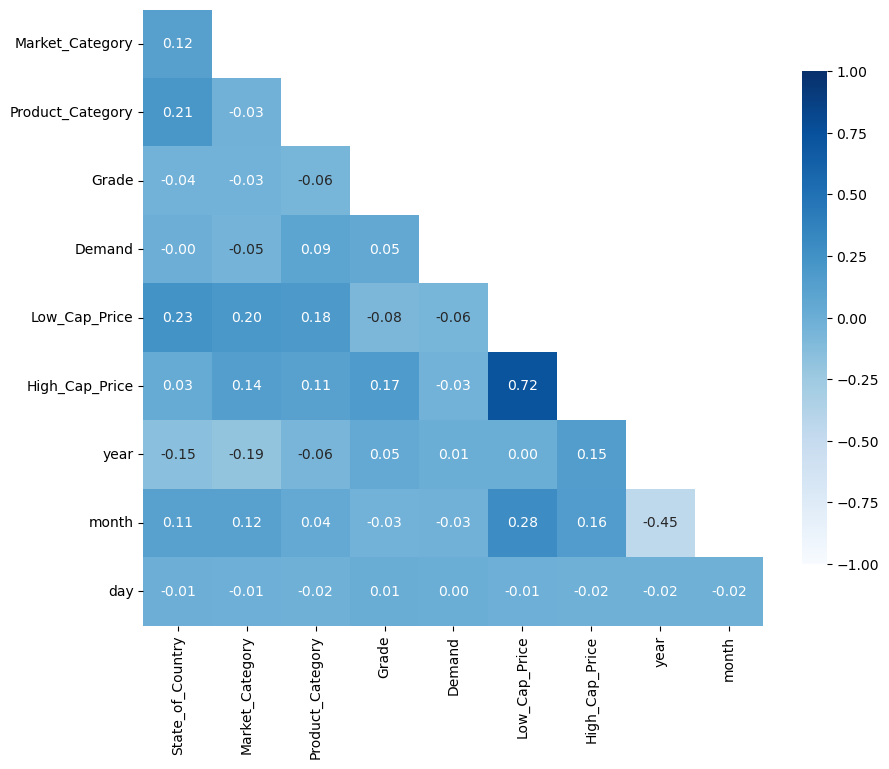

In [18]:
data_corr=data.corr()
np.ones_like(data_corr, dtype=bool)
mask = np.triu(np.ones_like(data_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(data_corr, dtype=bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [8]:
from sklearn import linear_model

In [19]:
X = data[['Market_Category','Product_Category','Grade','Demand', 'High_Cap_Price']]
y = data['Low_Cap_Price']

In [20]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.score(X,y)

0.5775042885174627

In [39]:
pred = regr.predict(X_test)
pred

array([ 2991.80872054,  4734.10681801, 11838.90062542, ...,
        5812.98230319,  5251.90767859,  6440.18536897])

In [40]:
data_submission=pd.DataFrame({
    'Item_Id': item_id,
    'Low_Cap_Price': pred.astype(int)
})
data_submission.to_csv("output.csv",index=False)

El score es muy bajo por lo que voy a intentar con el modelo GradientBoostingRegressor

In [21]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [22]:
#Fit
GBR.fit(X, y)
print("Accuracy --> ", GBR.score(X, y)*100)

Accuracy -->  85.04325320815795


In [23]:
X_test = test[['Market_Category','Product_Category','Grade','Demand', 'High_Cap_Price']]

predict = GBR.predict(X_test)

In [33]:
data

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,year,month,day
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240,2007,7,5
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756,2007,7,5
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669,2007,7,5
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313,2007,7,5
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257,2007,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9793,IT_95425,2010-06-08,20,255,0,2,30.4,124,604,2010,6,8
9794,IT_95456,2010-06-08,9,60,1,3,1480.0,225,1461,2010,6,8
9795,IT_95457,2010-06-08,21,37,1,2,24.4,4721,6637,2010,6,8
9796,IT_95472,2010-06-08,21,469,0,0,2.3,5082,6997,2010,6,8


In [35]:
predict.astype(int)

array([3253, 3783, 5616, ..., 6518, 5818, 5881])

In [36]:
data_submission=pd.DataFrame({
    'Item_Id': item_id,
    'Low_Cap_Price': predict.astype(int)
})
data_submission.to_csv("output.csv",index=False)